In [46]:
import numpy as np
import time
import matplotlib.pyplot as plt
%load_ext memory_profiler

In [25]:
def split(u, SIZE):
    nx = len(u)
    r = nx % SIZE
    u_array = np.split(u[r:], SIZE)
    u_array[0] = np.concatenate((u[:r], u_array[0]))
    # for i in range(1, len(u_array)):
    #     u_array[i] = np.insert(u_array[i], 0, u_array[i-1][-1])
    return u_array

In [26]:
# Generate sample data
array_sizes = [10**i for i in range(1, 7)]  # Varying sizes of array
split_sizes = [2, 5, 10, 20]  # Different splitting sizes

* TEST

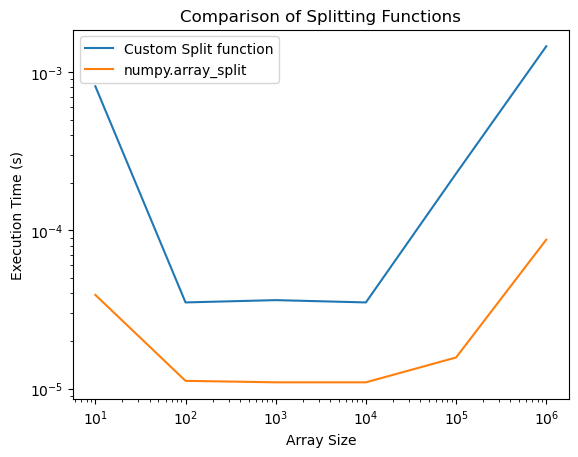

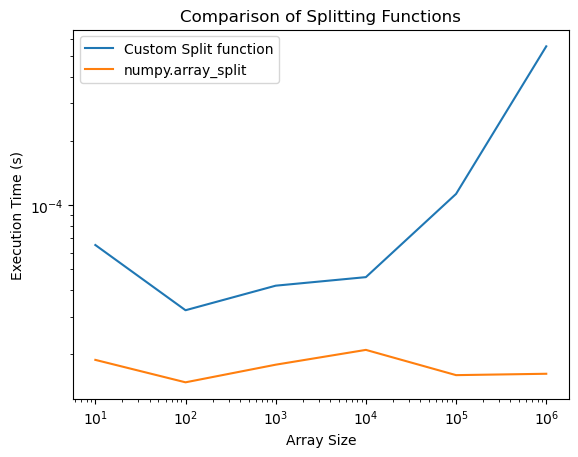

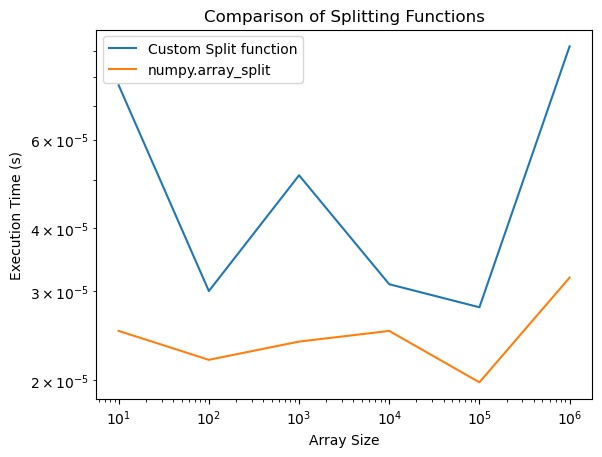

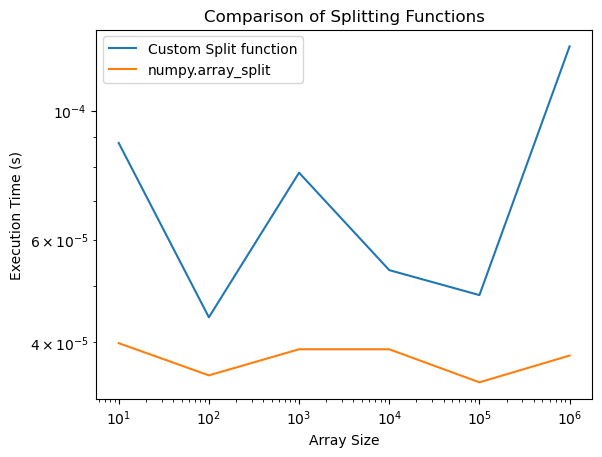

In [27]:
for SPLIT_SIZE in split_sizes:
    # Execution times
    custom_split_times = []
    numpy_split_times = []
    
    for size in array_sizes:
        u = np.random.rand(size)

        # Measure execution time for custom split function
        start_time = time.time()
        split(u, SPLIT_SIZE)
        end_time = time.time()
        custom_split_times.append(end_time - start_time)

        # Measure execution time for numpy.array_split
        start_time = time.time()
        np.array_split(u, SPLIT_SIZE)
        end_time = time.time()
        numpy_split_times.append(end_time - start_time)

    # Plotting the results
    plt.plot(array_sizes, custom_split_times, label='Custom Split function')
    plt.plot(array_sizes, numpy_split_times, label='numpy.array_split')
    plt.xlabel('Array Size')
    plt.ylabel('Execution Time (s)')
    plt.title('Comparison of Splitting Functions')
    plt.xscale('log')
    plt.yscale('log')
    plt.legend()
    plt.show()

In [31]:
u = np.arange(10)
SIZE = 7

u_array = np.array_split(u, SIZE)
print(u_array)

u_array_ = [np.concatenate(([u_array[i-1][-1]], u_array[i][1:])) for i in range(1, len(u_array))]
print(u_array_)

# for i in range(1, len(u_array)):
#     u_array[i] = np.insert(u_array[i], 0, u_array[i-1][-1])
# print(u_array)

[array([0, 1]), array([2, 3]), array([4, 5]), array([6]), array([7]), array([8]), array([9])]
[array([1, 3]), array([3, 5]), array([5]), array([6]), array([7]), array([8])]


In [44]:
%%timeit
u_array = np.array_split(u, SIZE)
u_array_ = [np.concatenate(([u_array[i-1][-1]], u_array[i])) for i in range(1, len(u_array))]
u_array_.insert(0, u_array[0])
#print(u_array_)

26.4 µs ± 338 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [45]:
%%timeit
u_array = np.array_split(u, SIZE)
for i in range(1, len(u_array)):
    u_array[i] = np.insert(u_array[i], 0, u_array[i-1][-1])
#print(u_array)

76.5 µs ± 2.65 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [73]:
def f1(u, SIZE):
    u_array = np.array_split(u, SIZE)
    u_array_ = [np.concatenate(([u_array[i-1][-1]], u_array[i])) for i in range(1, len(u_array))]
    u_array_.insert(0, u_array[0])
def f2(u, SIZE):
    u_array = np.array_split(u, SIZE)
    for i in range(1, len(u_array)):
        u_array[i] = np.insert(u_array[i], 0, u_array[i-1][-1])

In [74]:
%memit f1(u, SIZE)

peak memory: 164.04 MiB, increment: 0.00 MiB


In [75]:
%memit f2(u, SIZE)

peak memory: 164.05 MiB, increment: 0.04 MiB
